In [2]:
import matplotlib.pyplot as plt
from fpdf import FPDF
import pandas as pd
import numpy as np
import scipy.stats as stats
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from pandas.plotting import table
import seaborn as sns; sns.set(style="white", color_codes=True)
import six, os

In [14]:
sr = pd.read_excel('input/freez.xlsx')

srR = sr.loc[sr['ID'] == 'raw']
srF = sr.loc[sr['ID'] == 'freez']

srF.head(3)

,#inJob,ID,Fat,Prot.Cru.,Prot.Tru.,Lactose,TS,SNF,pH,Urea,...,Cells,H.index,Date,Vol.Tot,Temp,Time,Remark,Type,SubType,Collection date
5,6,freez,4.22,3.47,3.30,4.60,12.98,8.84,6.5,29.0,...,368,0.73,2021-03-16,33.25,34.14,16:37:42,Read Error,NORMAL,VALUE,16 марта
6,7,freez,4.34,3.48,3.32,4.64,13.15,8.88,6.5,26.8,...,385,0.69,2021-03-16,30.00,35.45,16:37:48,Read Error,NORMAL,VALUE,16 марта
7,8,freez,4.30,3.49,3.33,4.63,13.11,8.88,6.5,28.0,...,375,0.70,2021-03-16,30.00,35.80,16:37:54,Read Error,NORMAL,VALUE,16 марта


In [28]:
sr.groupby('ID').mean()

,#inJob,Fat,Prot.Cru.,Prot.Tru.,Lactose,TS,SNF,pH,Urea,Acetone,BHB,Cas.B,Cond.,FPD,Cells,H.index,Vol.Tot,Temp
ID,,,,,,,,,,,,,,,,,,
freez,13.5,4.27375,3.440625,3.27625,4.565,12.965,8.7575,6.50625,27.51875,0.000625,0.011875,2.68875,857.225,499.125,397.0625,0.725625,30.73875,35.211875
raw,3.0,4.31000,3.486000,3.32400,4.630,13.118,8.8800,6.50600,28.98000,0.000000,0.006000,2.72600,865.960,506.800,363.2000,0.706000,31.11400,36.054000


In [6]:
#Графики изменения среднего по параметрам

In [8]:
#Параметры нормой по среднему значению +/- погрешность прибора

,#inJob,Fat,Prot.Cru.,Prot.Tru.,Lactose,TS,SNF,pH,Urea,Acetone,BHB,Cas.B,Cond.,FPD,Cells,H.index,Vol.Tot,Temp
Date,,,,,,,,,,,,,,,,,,
2021-03-16,8.0,4.302,3.486,3.322,4.634,13.114,8.882,6.504,28.54,0.000,0.010,2.732,865.72,506.0,391.2,0.712,31.160,34.604
2021-03-17,13.0,4.156,3.340,3.178,4.420,12.584,8.490,6.498,25.56,0.002,0.018,2.594,837.80,482.4,360.6,0.764,30.556,35.640
2021-03-18,18.0,4.352,3.486,3.318,4.630,13.162,8.876,6.516,28.14,0.000,0.008,2.730,866.12,507.4,440.8,0.708,30.462,35.238
2021-03-19,21.0,4.330,3.490,3.330,4.620,13.140,8.880,6.510,29.10,0.000,0.010,2.740,867.40,507.0,390.0,0.690,30.930,35.980


In [56]:
par = ['Fat','Prot.Cru.','Prot.Tru.','Lactose','Urea','Cas.B','FPD','Cells']
rn = [0.1,0.1,0.1,0.1,5,0.2,5,20]

a1 = srF.groupby('Collection date').mean()

for i in range(0,8):
    
    print(str(par[i])+' plot doing ...')
    fig, axes = plt.subplots(figsize = (12,6))
    
    ct = srR[par[i]].mean()

    a1[par[i]].plot(color = '#55CBD3', marker='8')
    plt.scatter(srR['Collection date'],srR[par[i]], color = '#FFB68C', marker='*')
    plt.legend(['FreezMilk', 'RawMilk'])
    
    plt.axhspan(ct-rn[i], ct+rn[i], facecolor='green', alpha=0.05)
    
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title(par[i]+'\n', fontsize=20)
    
    plt.savefig('results/Mean_'+par[i]+'.png',dpi=200, bbox_inches="tight")
    plt.close()

Fat plot doing ...
Prot.Cru. plot doing ...
Prot.Tru. plot doing ...
Lactose plot doing ...
Urea plot doing ...
Cas.B plot doing ...
FPD plot doing ...
Cells plot doing ...


In [ ]:
#Параметры с фиксированной нормой

In [57]:
par = ['pH','Acetone', 'BHB', 'H.index', 'Temp']
r1 = [6.4, 0, 0, 0, 15, 38]
r2 = [6.7, 0.1, 0.1, 2, 40, 42]

a1 = srF.groupby('Collection date').mean()
#a2 = k2.groupby('Collection date').mean()

for i in range(0,5):
    
    print(str(par[i])+' plot doing ...')
    fig, axes = plt.subplots(figsize = (12,6))
    
    ct = srR[par[i]].mean()

    a1[par[i]].plot(color = '#55CBD3', marker='8')
    plt.scatter(srR['Collection date'],srR[par[i]], color = '#FFB68C', marker='*')
    plt.legend(['FreezMilk', 'RawMilk'])
    
    plt.axhspan(r1[i], r2[i], facecolor='green', alpha=0.05)
    
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title(par[i]+'\n', fontsize=20)
    
    plt.savefig('results/Mean_'+par[i]+'.png', dpi=200, bbox_inches="tight")
    plt.close()

pH plot doing ...
Acetone plot doing ...
BHB plot doing ...
H.index plot doing ...
Temp plot doing ...


In [ ]:
#Разброс значений в по каждому дню

In [70]:
par = ['Fat','Prot.Cru.', 'Prot.Tru.', 'Lactose',  'pH', 'Urea',
       'Acetone', 'BHB', 'Cas.B', 'Cond.', 'FPD', 'Cells', 
       'H.index', 'Vol.Tot', 'Temp', 'Time']

for i in range(len(par)-1):
    print(par[i])
    fig, axes = plt.subplots(figsize = (10,5))
    sns.swarmplot(x="Collection date", y=par[i], data=srR, color = '#FE8E7B').set_title(par[i]+'\n',fontsize=20)
    plt.plot([], [], "o", color="#55CBD3")
    sns.swarmplot(x="Collection date", y=par[i], data=srF, color = '#55CBD3').set_title(par[i]+'\n',fontsize=20)
    plt.plot([], [], "o", color="#FE8E7B")
    
    plt.legend(['FreezMilk', 'RawMilk'])
    plt.xticks(rotation=90)
    plt.xlabel('')

    #plt.axvline(7.5, color='grey', linestyle='--')
    #plt.axvline(11.5, linestyle='--')
    
    plt.savefig('results/Distr_'+par[i]+'.png',dpi=200, bbox_inches="tight")
    plt.close()


Fat
Prot.Cru.
Prot.Tru.
Lactose
pH
Urea
Acetone
BHB
Cas.B
Cond.
FPD
Cells
H.index
Vol.Tot
Temp


In [73]:
pdf = FPDF()
pth = 'results/freez-pic/'

imlst1 = [pth+'Mean_Fat.png',pth+'Mean_Lactose.png',pth+'Mean_Urea.png',pth+'Mean_pH.png']
imlst2 = [pth+'Mean_Prot.Cru..png',pth+'Mean_Cells.png',pth+'Mean_BHB.png',pth+'Mean_FPD.png']

pdf.add_page()
pdf.set_font('Arial', 'B', 12)
pdf.cell(60)
pdf.cell(10, 10, 'Freezing milk Exp. Mean values')
a = 10
b = 20

for image in imlst1:
    pdf.image(image,x = a, y = b, w = 80, h = 60)
    b = b+60

a = 100
b = 20
for image in imlst2:
    pdf.image(image,x = a, y = b, w = 80, h = 60)
    b = b+60
    
pdf.output("results/MeanValues.pdf", "F")

''

In [71]:
pdf = FPDF()
pth = 'results/freez-pic/'

imlst1 = [pth+'Distr_Fat.png',pth+'Distr_Lactose.png',pth+'Distr_Urea.png',pth+'Distr_pH.png']
imlst2 = [pth+'Distr_Prot.Cru..png',pth+'Distr_Cells.png',pth+'Distr_BHB.png',pth+'Distr_FPD.png']

pdf.add_page()
pdf.set_font('Arial', 'B', 12)
pdf.cell(60)
pdf.cell(10, 10, 'Freezing milk Exp. Distr values')
a = 10
b = 20

for image in imlst1:
    pdf.image(image,x = a, y = b, w = 80, h = 60)
    b = b+60

a = 100
b = 20
for image in imlst2:
    pdf.image(image,x = a, y = b, w = 80, h = 60)
    b = b+60
    
pdf.output("results/DistrValues.pdf", "F")

''

In [ ]:
#корреляции изменений

Text(0.5, 1.0, 'FreezEXP\n')

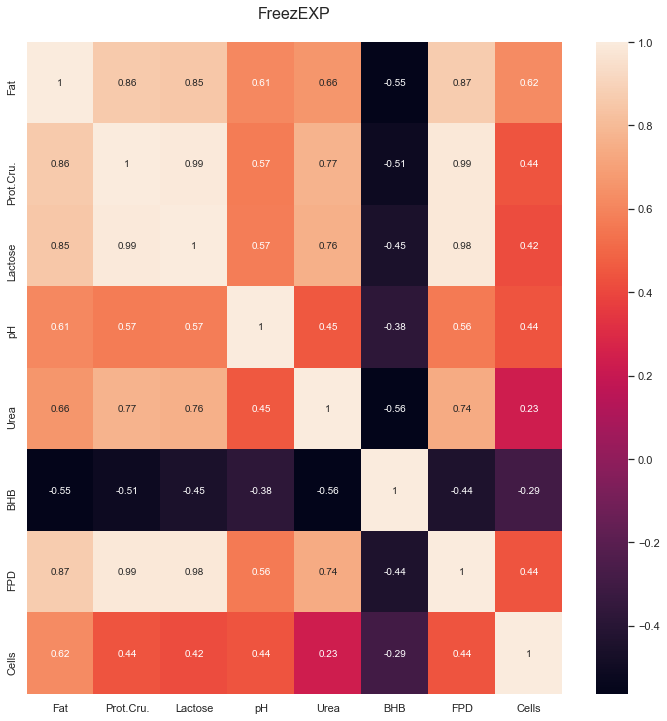

In [32]:
df1 = sr[['Fat','Prot.Cru.','Lactose','pH','Urea','BHB','FPD','Cells']]

corrMatrix = df1.corr()
fig, axes = plt.subplots(figsize = (12,12))
sns.heatmap(corrMatrix, annot=True)
plt.title('results/FreezEXP'+'\n', fontsize=16)

#plt.savefig(str('results/exp4/CorrMatr_SourEXP.jpg'), dpi=150, bbox_inches = "tight")